In [2]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14,
                 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'ytick.right': True, 'xtick.top':True, 'ytick.major.size': 10, 'xtick.major.size': 10,
                 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0})

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [5]:
pkl_file = open('../2020-03-29_15-48-35.pkl.gz', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()

dict_keys(['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7'])

In [6]:
print(mydata['Ch4'].shape)   

(10000, 2000)


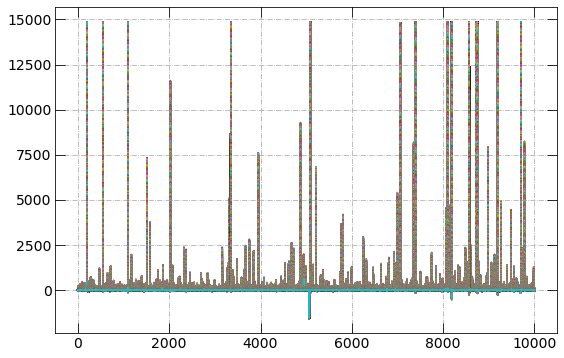

In [7]:
for key, value in mydata.items():
    plt.plot(value)
plt.show()    

In [8]:
import numpy.ma as ma
from scipy import stats

maskflow = np.ones(10000) == True

#print('test', maskflow.shape)
for key, value in mydata.items():
    satur = ma.masked_greater(value, 14600)
    
    linreg_array = np.array([])
    for row in value[:, 390:420]:
        y = row
        x = np.arange(len(row))

        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        trend= r_value * p_value

        mask = [trend > 0 ]

        linreg_array = np.append(linreg_array, mask, axis=0)
        mask_reg1 = linreg_array > 0
    print(mask_reg1)
    maskflow = maskflow & mask_reg1
    #evtselect=[mask_reg1]
    print(maskflow)


 

[ True False  True ...  True False False]
[ True False  True ...  True False False]
[ True  True False ... False  True  True]
[ True False False ... False False False]
[ True  True False ... False False  True]
[ True False False ... False False False]
[False False False ... False  True False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True  True  True ...  True False False]
[False False False ... False False False]


In [12]:
for key, value in mydata.items():
    print(value[maskflow].shape)
    plt.plot(value[maskflow].mean(axis=0))
plt.show()    

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2000 but corresponding boolean dimension is 10000

In [ ]:
for key, value in mydata.items():
    plt.plot(value.mean(axis=0))
plt.show()    

In [ ]:

    linreg_array = np.array([])
    for row in satur[:,390:420]:
        y = row
        x = np.arange(len(row))

        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        trend = r_value * p_value
        mask = [r_value > 0.6 ]

        linreg_array  = np.append(linreg_array , mask, axis=0)
        mask_reg2 = linreg_array  > 0
    evtselect=[mask_reg1*mask_reg2]
    print(evtselect)  